In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import TSNE

Uploading appropriate dataset

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

C:\Users\Malconius\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Malconius\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


# 1. Use PCA to reduce the dimensionality
## a. How many components did you use? Why?
 I used 153 components, because 153 out of 784 components explains 95% of the variance in our data. This means that 19.5% of our data contains 95% of the information that our dataset contains. However, looking at the graphs below, it looks like we can see an elbow in our data retention closer 85% of our data, which is contained in 75 components. However, we give up about 10% of our explanatory power with 1/2 of the components in the 95% explanation rate, so I think it is more worthwhile to go with the 153 components.

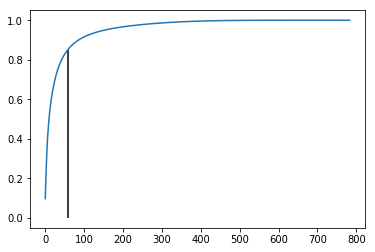

In [3]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio);
plt.vlines(ymin=0,ymax=cum_ratio[58],x=58);

In [4]:
eighty_five = np.argmax(cum_ratio >= 0.85)
print(eighty_five)
print(cum_ratio[eighty_five])

58
0.8508247062781695


In [5]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)

In [6]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


In [7]:
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)

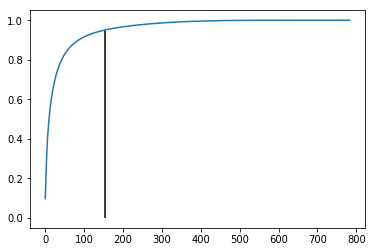

In [8]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio);
plt.vlines(ymin=0,ymax=cum_ratio[154],x=154);

## b. Plot the first two components. Do you notice any trends? What is this plot showing us?

Not quite sure how to answer this from the graph below, consult with Conner

In [9]:
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
X_2dim.shape

(70000, 2)

In [10]:
#variance explained by two components
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

We can see that a massive amount of information (17%) is captured by two components, so let's plot out the compression curve to see what the optimal number of components is:

<Figure size 432x288 with 0 Axes>

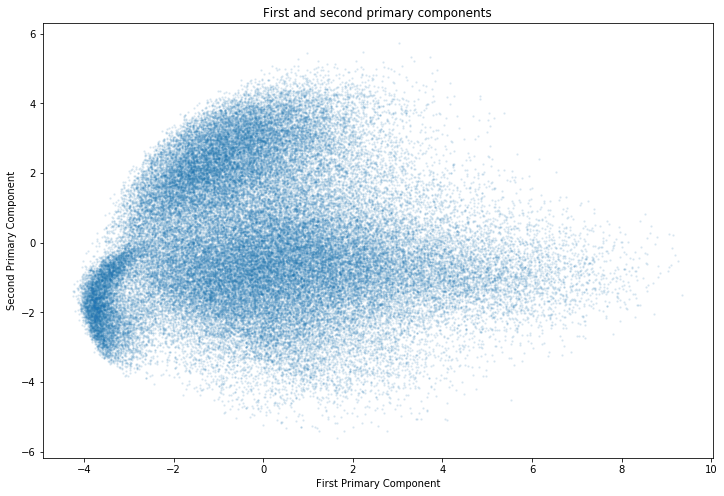

In [11]:
fig = plt.figure()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
x = X_2dim[:,0]
y = X_2dim[:,1]
points = X_2dim[:,2:4]
# color is the length of each vector in `points`
color = np.sqrt((points**2).sum(axis = 1))/np.sqrt(2.0)
rgb = plt.get_cmap('jet')(color)
ax.scatter(x, y, s=2, alpha=.1)
plt.xlabel('First Primary Component')
plt.ylabel('Second Primary Component')
plt.title('First and second primary components')
plt.show();

## c. Why would you use PCA? What is it doing? And what are the drawbacks?
The only drawback to using PCA is that you lose data, but that is the entire point of the process: to compress information by retaining the components with the most information. PCA does have limitations  and is not useful in every circumstance-- the first and most important being that the principle components are linear combination of the original data. By using PCA, we are assuming that this assumption is valid. Without it, our prediction will not produce the desired compressed results.

# d. Plot some of the images, then compress them using PCA and plot again. How does it look?

In [12]:
pca = PCA(n_components=784)
X_2dim = pca.fit_transform(X)
X_2dim.shape

(70000, 784)

In [13]:
def pcaplotter(components1, components2, imagenumber):
    fig = plt.figure(figsize=(15,8))

    #original image
    plt.subplot(1, 3, 1);
    plt.imshow(X[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('All components', fontsize=11)
    plt.title('100 Percent', fontsize = 13);

    #reduced image
    plt.subplot(1, 3, 2);
    pca = PCA(n_components=components1)
    reduced_image = pca.fit_transform(X)
    revert_image = pca.inverse_transform(reduced_image)
    plt.imshow(revert_image[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('%i components' %components1, fontsize=11)
    plt.title('95 Percent of info', fontsize = 13);

    #reduced image
    plt.subplot(1, 3, 3);
    pca = PCA(n_components=components2)
    reduced_image = pca.fit_transform(X)
    revert_image = pca.inverse_transform(reduced_image)
    plt.imshow(revert_image[imagenumber].reshape((28,28)), cmap='Greys');
    plt.xlabel('%i components' %components2, fontsize=11)
    plt.title('Very reduced quality', fontsize = 13);

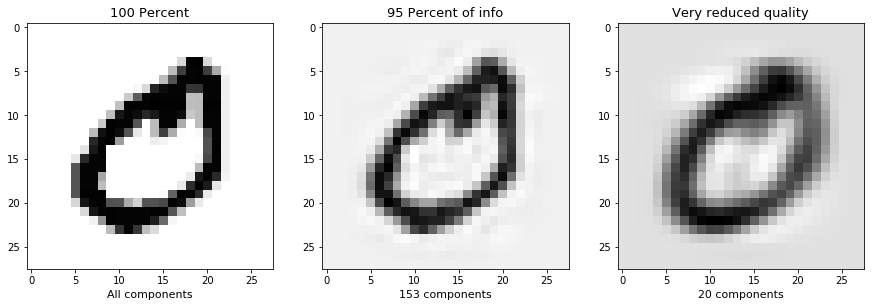

In [14]:
pcaplotter(153, 20, 1)

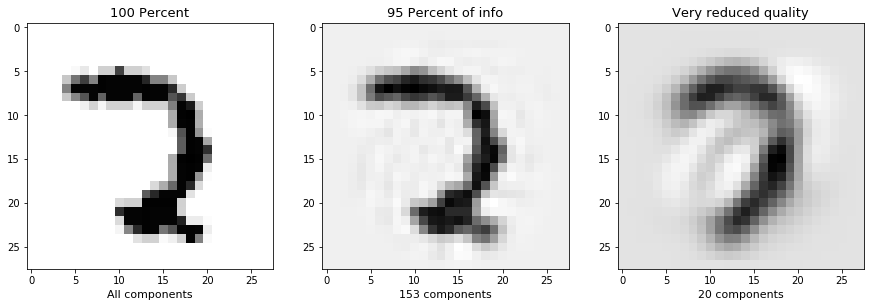

In [15]:
pcaplotter(153, 20, 17000)

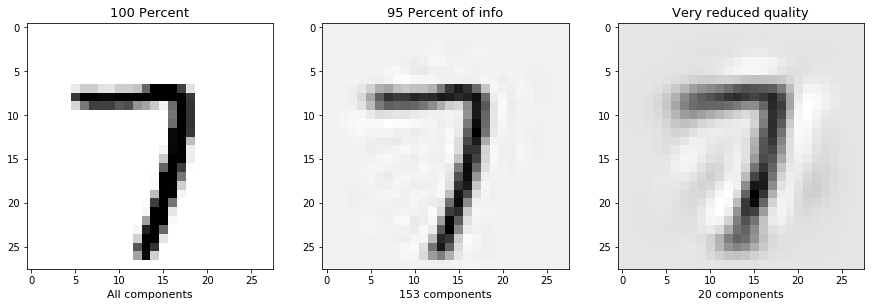

In [16]:
pcaplotter(153, 20, 47000)

# 2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):


## a. How does this plot differ from your PCA plot? 

In [29]:
def tsnereducer(perp1, lr, stepnum):
    #setting number of components equal to the number needed to retain 95% of information
    pca = PCA(n_components=154)
    reduced_image = pca.fit_transform(X)
    
    #get random sample of images
    imageselections = np.arange(70000)
    np.random.shuffle(imageselections)
    randomsample = 10000
   
    #setting up t-sne plot
    tsne = TSNE(n_components=2,  verbose=1, perplexity=perp1,  learning_rate=lr, n_iter=stepnum)
    tsneoutcome = tsne.fit_transform(reduced_image[imageselections[:randomsample],:])
    tsnedf = pd.DataFrame(tsneoutcome, columns=['componentone', 'componenttwo'])
    tsnedf['label'] = y[imageselections[:randomsample]]
    
    #plotting
    fig = plt.figure(figsize=(8,8))
    sns.lmplot(x='componentone', y='componenttwo', data=tsnedf, hue='label', fit_reg=False)
    plt.title("First Two Components, Perplexity = %i" %perp1, fontsize=15)


In [30]:
tsnereducer(5,200,1000)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.119s...
[t-SNE] Computed neighbors for 10000 samples in 32.742s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.296409
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.769066
[t-SNE] KL divergence after 1000 iterations: 1.951794


<Figure size 576x576 with 0 Axes>

ValueError: Image size of 500x150032 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 529.625x360 with 1 Axes>

## b. How robust is it to changes in perplexity?

In [ ]:
tsnereducer(30,200,1000)

In [ ]:
tsnereducer(50,200,1000)

## c. How robust is it to different learning rate and number of iterations?

In [ ]:
tsnereducer(50,200,100)

In [ ]:
tsnereducer(50,200,500)

In [ ]:
tsnereducer(50,200,1200)

# 3. Perform k-means clustering:

## a. How did you choose k?



## b. How did you evaluate your clustering?

## c. Visualize your clusters using t-sne

## d. Did you scale your data?

## e. How robust is your clustering?



# 4. Perform hierarchical clustering:

## a. Plot your dendrogram

## b. How many clusters seem reasonable based off your graph?

## c. How does your dendrogram change with different linkage methods?

# Acknowlegdment
Below is a complete list of notebooks and various webpages from which I gathered code and ideas:


https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html

https://github.com/tfolkman/byu_econ_applied_machine_learning/blob/master/lectures/Lecture_12_Dimensionality%20Reduction.ipynb
